**Udemy 4-8. ANN for Image Classification**

Note 1: We are using **GPU** now

Note 2: We will use **batch gradient descent**

Note 3: We will use torchvision to download the **MNIST** dataset

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Downloading train dataset
train_dataset = torchvision.datasets.MNIST(
    root='.', # It specifies the file path we want to download the data to. -> Local Directory
    train=True, # Train Dataset
    transform=transforms.ToTensor(), # Preprocessing
    download=True,
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [3]:
train_dataset.data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [4]:
train_dataset.data.max() # max is 255 most of the picture are blank -> zero

tensor(255, dtype=torch.uint8)

In [5]:
train_dataset.data.shape

torch.Size([60000, 28, 28])

In [6]:
train_dataset.targets # 60000 data between 0 and 9

tensor([5, 0, 4,  ..., 5, 6, 8])

In [7]:
test_dataset = torchvision.datasets.MNIST(
    root='.',
    train=False, # test dataset
    transform=transforms.ToTensor(),
    download=True,
)
# Note: Nothing is downloaded because in the previous section it was downloaded

test_dataset.data.shape

torch.Size([10000, 28, 28])

In [8]:
# Build the model
model = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)
# No need for final Softmax -> In this case using max function would be enough because we don't want the probabilities

In [9]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cuda:0


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)

In [10]:
# Loss and Optimiser
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [11]:
# Data Loader
# Useful because it automatically generates batches in the training loop and take care of shuffling
batch_size = 128
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True,
)

test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False,
)

In [12]:
# Check what a DataLoader does:
# - maps the value to (0,1)
# - makes the data of shape (batch_size, color, height, width)
tmp_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=1,
    shuffle=True,
)

for x, y in tmp_loader:
  print(x)
  print(x.shape)
  print(y.shape)
  break

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [13]:
train_dataset.transform(train_dataset.data.numpy()).max() #??? 

tensor(1.)

In [14]:
# Train the model
n_epochs = 10

# Stuff to stores
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for it in range(n_epochs):
  train_loss = []
  for inputs, targets in train_loader:
    # Move the data to GPU
    inputs, targets = inputs.to(device), targets.to(device)

    # Reshape the input
    inputs = inputs.view(-1, 784)

    # Zero the parameters gradients
    optimizer.zero_grad()

    # Forward Pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    # Backward and Optimize
    loss.backward()
    optimizer.step()

    train_loss.append(loss.item())

  # Get train loss and test loss
  train_loss = np.mean(train_loss)
  # Note: A litte misleading: It not the real loss at the end of the batch training. 
  # It the mean of the model loss in different stages of the model training. But
  # It can be helpful.

  # Test loss
  test_loss = []
  for inputs, targets in test_loader:
    inputs, targets = inputs.to(device), targets.to(device) # Move the data to GPU
    inputs = inputs.view(-1, 784) # Reshape the input
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    test_loss.append(loss.item())
  test_loss = np.mean(test_loss)

  # Save losses
  train_losses[it] = train_loss
  test_losses[it] = test_loss

  print(f"Epoch {it+1}/{n_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")



Epoch 1/10, Train Loss: 0.4180, Test Loss: 0.2228
Epoch 2/10, Train Loss: 0.1932, Test Loss: 0.1589
Epoch 3/10, Train Loss: 0.1425, Test Loss: 0.1291
Epoch 4/10, Train Loss: 0.1114, Test Loss: 0.1095
Epoch 5/10, Train Loss: 0.0907, Test Loss: 0.0968
Epoch 6/10, Train Loss: 0.0745, Test Loss: 0.0911
Epoch 7/10, Train Loss: 0.0628, Test Loss: 0.0832
Epoch 8/10, Train Loss: 0.0537, Test Loss: 0.0826
Epoch 9/10, Train Loss: 0.0457, Test Loss: 0.0801
Epoch 10/10, Train Loss: 0.0387, Test Loss: 0.0725


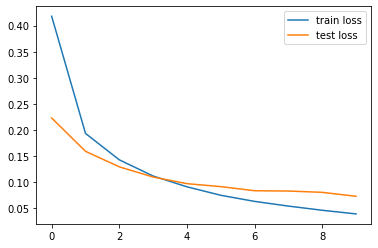

In [17]:
# Plot the train loss and test loss per iteration
plt.plot(train_losses, label="train loss")
plt.plot(test_losses, label="test loss")
plt.legend()
plt.show()

In [16]:
# Calculating the Accuracy for train_dataset
n_correct = 0
n_total = 0
for inputs, targets in train_loader:
  inputs, targets = inputs.to(device), targets.to(device) # Move the data to GPU
  inputs = inputs.reshape(-1,784) # Reshape the input
  outputs = model(inputs) # Forward pass

  # Get the prediction
  # torch.max returns both max and argmax
  _, predictions = torch.max(outputs, 1)

  # Update counts
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

train_acc = n_correct / n_total


# Calculating the Accuracy for test_dataset
n_correct = 0
n_total = 0
for inputs, targets in test_loader:
  inputs, targets = inputs.to(device), targets.to(device) # Move the data to GPU
  inputs = inputs.reshape(-1,784) # Reshape the input
  outputs = model(inputs) # Forward pass

  # Get the prediction
  # torch.max returns both max and argmax
  _, predictions = torch.max(outputs, 1)

  # Update counts
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

test_acc = n_correct / n_total

print(f"Train accuracy: {train_acc:.4f}, Test accuracy: {test_acc:.4f}")

Train accuracy: 0.9933, Test accuracy: 0.9781


In [32]:
#plot Confusion Matrix 
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
import matplotlib.pyplot as plt


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='confusion_matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting 'normalize=True'
  """

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print("Confusion Matrix without Normalization")
  
  print(cm)
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max()/2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             ha='center', # horizontalalignment
             va='center', # verticalalignment
             color="white" if cm[i,j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel("True Label")
  plt.xlabel("Predicted Label")
  plt.show()


Confusion Matrix without Normalization
[[ 972    0    1    0    2    1    1    1    2    0]
 [   0 1126    3    1    0    1    2    0    2    0]
 [   4    3 1004    7    3    0    2    4    4    1]
 [   0    0    2  993    0    6    0    3    2    4]
 [   1    0    5    0  965    0    3    0    0    8]
 [   3    1    0    5    2  870    3    1    4    3]
 [   6    2    1    1    3    6  937    0    2    0]
 [   0    4   12    4    2    1    0  995    1    9]
 [   3    1    2    7    7    4    2    3  939    6]
 [   2    3    0    6   10    4    0    2    2  980]]


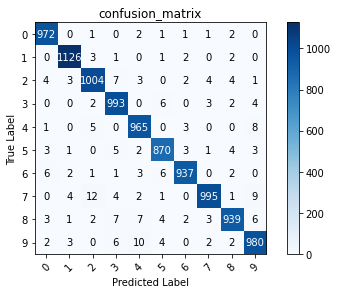

In [35]:
# Get all predictions in an array and plot confusion matrix
x_test = test_dataset.data.numpy()
y_test = test_dataset.targets.numpy()
p_test = np.array([])

for inputs, targets in test_loader:
  # Move data to GPU
  inputs = inputs.to(device)

  # Reshape the inputs
  inputs = inputs.view(-1,784)

  # Forward Pass
  outputs = model(inputs)

  # Get prediction
  _, predictions = torch.max(outputs, 1)

  # Update p_test
  p_test = np.concatenate((p_test, predictions.cpu().numpy()))

cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))